<a href="https://colab.research.google.com/github/Jhonatabz/matematica-computacional-cc-2025/blob/main/matematica_computacional_atividade0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuração e Importações

`numpy` para os cálculos matemáticos  
`matplotlib.pyplot` para a visualização

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

# Função Auxiliar para Plotar Vetores

In [ ]:
def plot_vetores(vetores, cores, legendas, titulo):
    """
    Args:
        vetores: Lista de vetores (arrays 2D do NumPy).
        cores: Lista de cores para cada vetor.
        legendas: Lista de legendas para cada vetor.
        titulo: Título do gráfico.
    """
    plt.figure(figsize=(6, 6))
    ax = plt.gca()

    # Plota cada vetor
    for vetor, cor, legenda in zip(vetores, cores, legendas):
        # Garante que o vetor tenha o formato correto (1D de 2 elementos)
        vet = vetor.flatten()
        ax.quiver(0, 0, vet[0], vet[1], angles='xy', scale_units='xy', scale=1, color=cor, label=legenda)

    # Configura os limites do gráfico para melhor visualização
    max_val = np.max(np.abs(vetores)) * 1.5
    if max_val == 0:
        max_val = 1

    ax.set_xlim([-max_val, max_val])
    ax.set_ylim([-max_val, max_val])

    # Desenha os eixos x e y
    ax.axhline(0, color='grey', lw=0.5)
    ax.axvline(0, color='grey', lw=0.5)

    # Garante que a proporção seja igual (aspecto 1:1)
    ax.set_aspect('equal', adjustable='box')

    plt.title(titulo)
    plt.legend()
    plt.grid(True)
    plt.show()

# Vetores da Base  
Posição dos vetores da base antes da rotação

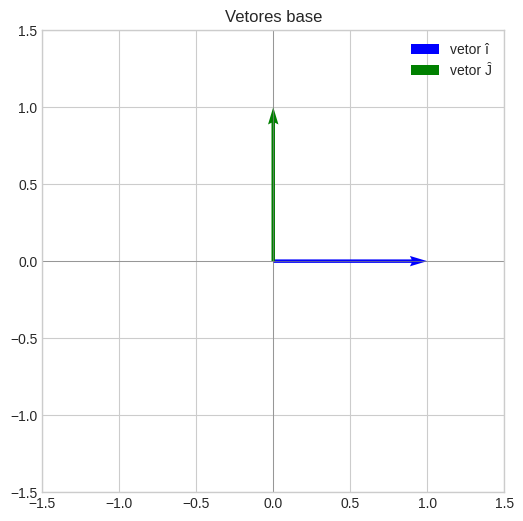

In [ ]:
# Vetores de Base
i_unitario = np.array([1, 0])
j_unitario = np.array([0, 1])

plot_vetores(
    vetores=[i_unitario,j_unitario],
    cores=['blue','green'],
    legendas=['vetor î','vetor Ĵ'],
    titulo='Vetores base')

# Matriz de Rotação Horária a partir dos Vetores Base  

Uma transformação linear é completamente definida por onde ela "leva" os vetores da base.  
No nosso caso, a base é $\hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ e $\hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$.

Rotação de $\hat{i}$:  
Se rotacionarmos $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ (que aponta para a direita) 90° no sentido horário, ele passará a apontar para baixo, tornando-se $\begin{bmatrix} 0 \\ -1 \end{bmatrix}$.  
Rotação de $\hat{j}$:  
Se rotacionarmos $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$ (que aponta para cima) 90° no sentido horário, ele passará a apontar para a direita, tornando-se $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$.  
A matriz de transformação $R$ é formada por esses novos vetores como suas colunas:

$R = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$  

Mostrando isso graficamente:

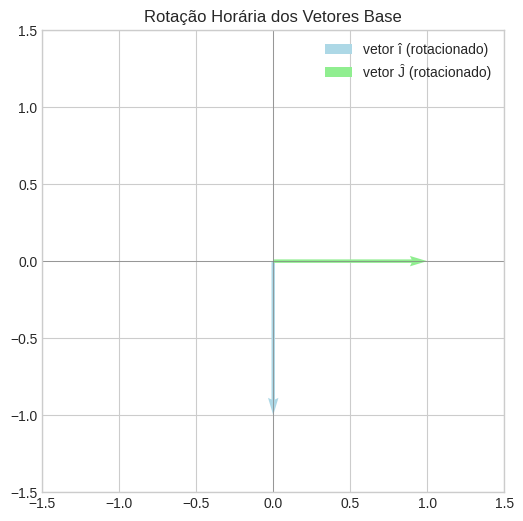

In [ ]:
# Para onde eles vão após a rotação de 90° horária:
i_unitario_rot = np.array([0, -1])
j_unitario_rot = np.array([1, 0])

# A matriz de transformação é composta por esses novos vetores nas colunas
R = np.array([i_unitario_rot, j_unitario_rot]).T
# .T (Transposta) é usado pois o NumPy monta vetores como linhas por padrão

# Demonstração gráfica
plot_vetores(
    vetores=[i_unitario_rot, j_unitario_rot],
    cores=['lightblue', 'lightgreen'],
    legendas=['vetor î (rotacionado)', 'vetor Ĵ (rotacionado)'],
    titulo="Rotação Horária dos Vetores Base"
)

# Aplicação da Rotação a Vetores Arbitrários  
Agora, aplicando a matriz $R$ a dois vetores arbitrários  
Escolhendo $v_1 = \begin{bmatrix} 2 \\ 3 \end{bmatrix}$ e $v_2 = \begin{bmatrix} -1 \\ 2 \end{bmatrix}$.  

A transformação é uma multiplicação matriz-vetor: $v' = R \cdot v$  

Resultado numérico de $R \cdot v1:\begin{bmatrix} 3 \\ -2 \end{bmatrix}$,
Resultado numérico de $R \cdot v2:\begin{bmatrix} 2 \\ 1 \end{bmatrix}$

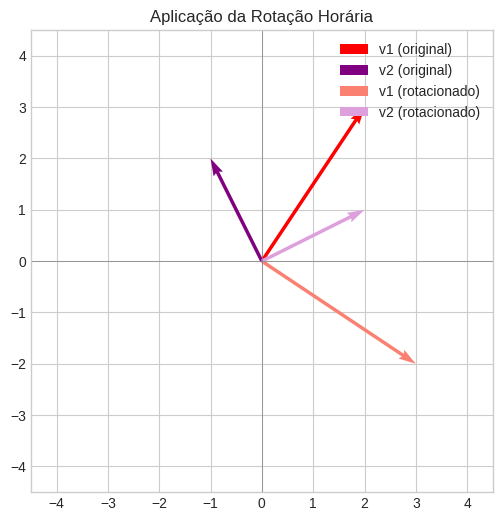

In [ ]:
# Definindo dois vetores arbitrários
v1 = np.array([2, 3])
v2 = np.array([-1, 2])

# Aplicando a transformação (multiplicação da matriz R pelos vetores)
# A função np.dot() faz a multiplicação de matrizes/vetores
v1_rot = np.dot(R, v1)
v2_rot = np.dot(R, v2)

plot_vetores(
    vetores=[v1, v2, v1_rot, v2_rot],
    cores=['red', 'purple', 'salmon', 'plum'],
    legendas=['v1 (original)', 'v2 (original)', 'v1 (rotacionado)', 'v2 (rotacionado)'],
    titulo="Aplicação da Rotação Horária"
)

# Shear (cisalhamento) em x  
Matriz de Cisalhamento em x a partir dos Vetores Base  

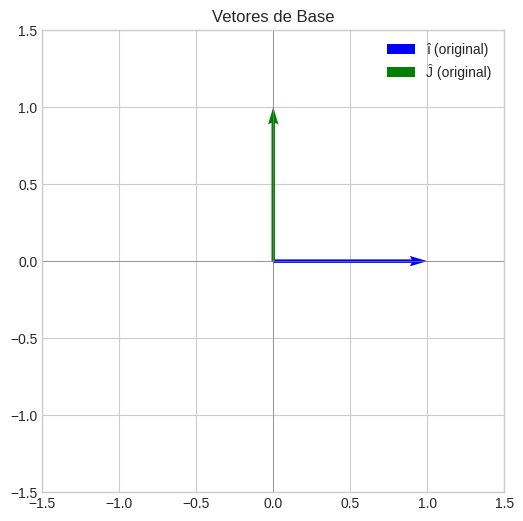

In [ ]:
plot_vetores(
    vetores=[i_unitario, j_unitario],
    cores=['blue','green'],
    legendas=['î (original)', 'Ĵ (original)'],
    titulo="Vetores de Base"
)

Transformação de $\hat{i}$:  
O vetor $\hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ está sobre o eixo x (sua coordenada y é 0).  
Portanto, ele não é "empurrado" e permanece o mesmo: $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$.  
Transformação de $\hat{j}$:  
O vetor $\hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$ tem coordenada y igual a 1.  
Ele será "empurrado" para a direita por um fator $k$.  
Sua coordenada x se torna $k$ e a y não muda. O novo vetor é $\begin{bmatrix} k \\ 1 \end{bmatrix}$.  
Usando um fator $k=1.5$.  $\hat{j}$ se torna $\begin{bmatrix} 1.5 \\ 1 \end{bmatrix}$.  
A matriz de transformação $S_x$ (Shear em x) é:  
$S_x = \begin{bmatrix} 1 & 1.5 \\ 0 & 1 \end{bmatrix}$

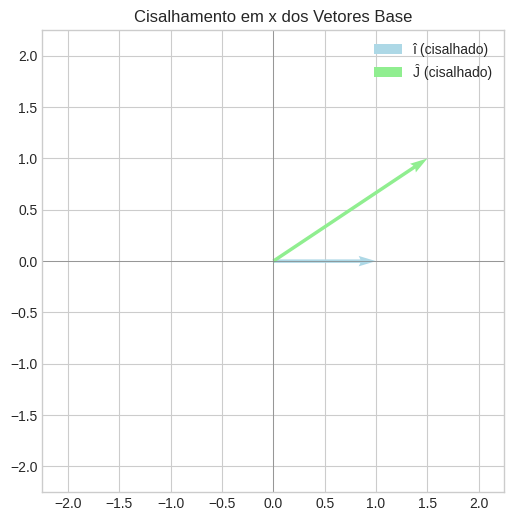

In [ ]:
# Para onde eles vão após o cisalhamento em x (com k=1.5)
# i-unitario não muda, pois sua coordenada y é 0
i_unitario_shear = np.array([1, 0])
# j-unitario é "empurrado" 1.5 unidades em x, pois sua coordenada y é 1
j_unitario_shear = np.array([1.5, 1])

# A matriz é composta por esses novos vetores nas colunas
Sx = np.array([i_unitario_shear, j_unitario_shear]).T

# Demonstração gráfica
plot_vetores(
    vetores=[i_unitario_shear, j_unitario_shear],
    cores=['lightblue', 'lightgreen'],
    legendas=['î (cisalhado)', 'Ĵ (cisalhado)'],
    titulo="Cisalhamento em x dos Vetores Base"
)

# Aplicação do Cisalhamento a Vetores Arbitrários  
Usando os vetores $v_1 = \begin{bmatrix} 2 \\ 3 \end{bmatrix}$ e $v_2 = \begin{bmatrix} -1 \\ 2 \end{bmatrix}$.    

A transformação é $v' = S_x \cdot v$  
Resultado numérico de $S_x \cdot v1:\begin{bmatrix} 6.5 \\ 3 \end{bmatrix}$  , Resultado numérico de $S_x \cdot v2:\begin{bmatrix} 2 \\ 2 \end{bmatrix}$


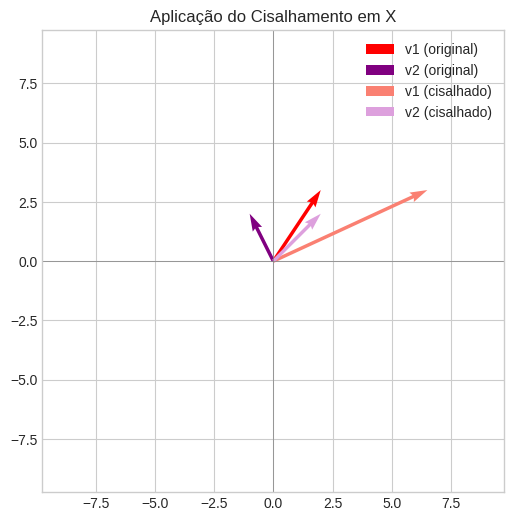

In [ ]:
# Usando os vetores v1 e v2
# Aplicando a transformação (multiplicação da matriz Sx pelos vetores)
v1_shear = np.dot(Sx, v1)
v2_shear = np.dot(Sx, v2)

# Apresentação Gráfica
plot_vetores(
    vetores=[v1, v2, v1_shear, v2_shear],
    cores=['red', 'purple', 'salmon', 'plum'],
    legendas=['v1 (original)', 'v2 (original)', 'v1 (cisalhado)', 'v2 (cisalhado)'],
    titulo="Aplicação do Cisalhamento em X"
)